# Exploratory Data Analysis

In [98]:
from collections import Counter
from pprint import pprint

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
train = pd.read_json('Review-Comment-Generation/trans_data/train.jsonl', lines=True)
val = pd.read_json('Review-Comment-Generation/trans_data/val.jsonl', lines=True)
test = pd.read_json('Review-Comment-Generation/trans_data/test.jsonl', lines=True)

joined_df = pd.concat([train, val, test])

## Basic Analysis

### Check basic information

Check shapes:

In [9]:
print("Shape of train:", train.shape)
print("Shape of val:", val.shape)
print("Shape of test:", test.shape)

Shape of train: (13756, 2)
Shape of val: (1719, 2)
Shape of test: (1719, 2)


Check features:

In [12]:
print(*train.columns.join(val.columns).join(test.columns), sep='\n')

code_tokens
docstring_tokens


### Check heads and tails

Train heads and tails:

In [13]:
train.head(10)

,code_tokens,docstring_tokens
0,"[protected, static, String, commentFormat(Stri...","[String.isEmpty(), is, avaible, only, as, of, ..."
1,"[public, PageTitle(final, String, namespace,, ...","[Does, \s, include, zero-width, non-joiner, an..."
2,"[public, void, onCatch(Throwable, caught), {, ...","[Should, we, log, or, re-throw, any, other, su..."
3,"[public, PageTitle(final, String, namespace,, ...","[You, could, collapse, this, and, the, new, co..."
4,"[public, void, bookmarkPage(), {, new, Bookmar...","[Do, we, really, need, a, toast, for, ""bookmar..."
5,"[public, void, setEnabled(boolean, enabled), {...","[Always, enclose, if, (and, other, conditional..."
6,"[public, void, onSaveInstanceState(Bundle, out...","[Is, this, being, read, anywhere?, plus, we, s..."
7,"[public, void, onChangeTextSize(ChangeTextSize...","[I, would, probably, drop, the, calculation,, ..."
8,"[private, boolean, shouldSkip(), {, //, Mainta...","[This, whole, last, block, from, line, 187, to..."
9,"[private, LanguagesAdapter(List<String>, langu...","[A, defensive, copy, of, the, list, would, be,..."


In [14]:
train.tail(10)

,code_tokens,docstring_tokens
13746,"[public, ParseGeoPoint, getLocation(), {, retu...","[Change, to, getParseGeoPoint(""location""), so,..."
13747,"[public, static, UserFragment, newInstance(Str...","[Keep, extra, in, this, file.]"
13748,"[public, void, loadRepository(boolean, refresh...","[private, Also,, should, put, the, 3, load, me..."
13749,"[public, void, reloadData(), {, setContentShow...",[private]
13750,"[public, static, NotificationListFragment, new...","[This, change, isn't, really, needed,, right?]"
13751,"[protected, void, onInitExtras(Bundle, extras)...","[Oops,, right.]"
13752,"[protected, Fragment, getFragment(int, positio...","[if, (position, ==, 0), probably, better, expr..."
13753,"[int, read(), {, if, (this.hasNext(), ==, fals...","[`if, (!this.hasNext())`]"
13754,"[public, void, testIntersectsOnGeometryCollect...","[I, modified, the, test, to, ensure, that, if,..."
13755,"[public, Unit(String, unitName,, boolean, enem...","[Que, es, este, 1?]"


Validation heads and tails:

In [15]:
val.head(10)

,code_tokens,docstring_tokens
0,"[public, void, startRuntime(), {, String, temp...","[Setting, the, alias, and, temp, directory, ca..."
1,"[public, GWCConfig, getConfig(), {, if, (gsEnv...","[This, bloc, of, code, is, repeated, many, tim..."
2,"[private, BlackboardArtifact, createDownloadAr...","[again,, maybe, StringUtils.defaultString()]"
3,"[public, IncrementalScoreDirector(IncrementalS...","[I, fear, we, won't, be, able, to, add, this, ..."
4,"[public, static, void, copyFile(InputStream, i...","[no, need, for, the, return, statement.]"
5,"[protected, void, before(), throws, Throwable,...","[Change, to, `Assert.state(session, !=, null,,..."
6,"[private, void, lockImageInDb(), {, final, Dis...","[Not, needed,, the, next, statement, handles, ..."
7,"[public, synchronized, void, close(), {, try, ...","[What's, the, motivation, for, swallowing, thi..."
8,"[public, void, testFooPing(), {, //, change, l...","[The, logging, actually, happens, on, the, ""cl..."
9,"[public, void, searchForProcesses(), throws, E...","[One, empty, line, too, much.]"


In [16]:
val.tail(10)

,code_tokens,docstring_tokens
1709,"[public, String, getTitle(), {, return, this.i...","[`this.id`, ->, `id`]"
1710,"[private, void, buildIndex(), {, int, i, =, 0;...","[style, nit:, we, don't, use, braces, around, ..."
1711,"[private, URL, deploymentOne(), throws, Throwa...","[Remove, this]"
1712,"[public, static, void, initialize(Props, props...","[return, right, away, if, initialized, already?]"
1713,"[void, cancel(), {, if, (callback, !=, null), ...","[This, check, can, be, dropped.]"
1714,"[protected, Map<K,, V>, copy(Map<K,, V>, sourc...","[I, think, we, could, get, rid, of, the, `altK..."
1715,"[protected, void, limitTotalNumberOfCnxns(), t...","[A, graceful, shutdown, would, be, nice., See,..."
1716,"[public, static, TLSClientParametersFactory, g...","[Consider, using, a, Singleton, pattern, here...."
1717,"[public, static, XmlForm, parse(String, xml,, ...","[Maybe, incorportate, it, into, debug, logging..."
1718,"[protected, BitmapFont, newBitmapFont(BitmapFo...","[it, should, use, integer, parameter, instead,..."


Test heads and tails:

In [17]:
test.head(10)

,code_tokens,docstring_tokens
0,"[private, static, Set<String>, getRootQualifie...","[I, think, LIBRARY, are, no, more, used]"
1,"[public, RuntimeFilterManager(QueryWorkUnit, w...","[Consider, using, `System.lineSeparator()`, in..."
2,"[private, void, activateMarkers(), {, if, (!fG...","[ChangeDetailEditor_EGerriTipValue, has, no, m..."
3,"[public, void, testCreate(), throws, StripeExc...","[should, be, called, `resource`]"
4,"[private, FirewallRule, findById(List<Firewall...","[Just, `return, rule`.]"
5,"[public, void, addDownload(String, download){,...","[Should, probably, use, a, Set<String>, instea..."
6,"[public, void, copyDetailsFromOtherCuObjectCod...","[Should, this, be, 1, or, null, instead, of, 0?]"
7,"[private, void, loadVncData(HasConsoleModel, m...","[You, can, not, be, sure, that, the, value, is..."
8,"[private, RuleApplication, applyRule(), {, Sym...","[These, arguments, can, all, go, on, the, same..."
9,"[public, void, testPushDownArray(), throws, Ex...","[Why, the, expected, output, was, changed?]"


In [18]:
test.tail(10)

,code_tokens,docstring_tokens
1709,"[public, URI, getLocationHeaderAsURI(), {, try...","[Good, catch., I, also, just, spotted, that, a..."
1710,"[public, void, setup(Method, method), throws, ...","[This, seems, redundant, to, me, as, we, are, ..."
1711,"[public, View, getOverflowMenuAnchor(), {, Vie...","[Any, reason, not, to, check, value, of, the, ..."
1712,"[public, List<ResponseInfo>, sendAndPoll(List<...","[I, thought, we, will, catch, the, exception, ..."
1713,"[public, void, handleQuotaColumnVisibility(), ...","[As, far, as, I, know,, enums, can, be, used, ..."
1714,"[public, CompletableFuture<StaticResource>, ge...","[shouldn't, you, force, the, put?, Otherwise,,..."
1715,"[public, void, testSessionTicketsWithTLSv13And...","[OpenSSL, also, supports, it, in, a, similar, ..."
1716,"[public, void, setUp(), {, TmfEventMatching.re...","[a, BeforeClass, has, to, be, static, (it, doe..."
1717,"[protected, void, updateTitle(String, brand), ...","[Would, it, make, more, sense, to, mark, the, ..."
1718,"[public, static, int, getSegmentForKey(Object,...","[I'd, rather, throw, an, exception]"


### Check count of each Codes and Docstring

Codes:

In [35]:
train['code_tokens'].apply(len).describe()

count    13756.000000
mean        26.939445
std         15.677888
min          3.000000
25%         15.000000
50%         24.000000
75%         35.000000
max        189.000000
Name: code_tokens, dtype: float64

In [36]:
val['code_tokens'].apply(len).describe()

count    1719.000000
mean       26.753345
std        15.859677
min         3.000000
25%        15.000000
50%        24.000000
75%        35.000000
max       206.000000
Name: code_tokens, dtype: float64

In [37]:
test['code_tokens'].apply(len).describe()

count    1719.000000
mean       26.663758
std        15.419845
min         2.000000
25%        15.000000
50%        24.000000
75%        35.000000
max       119.000000
Name: code_tokens, dtype: float64

<Axes: xlabel='code_tokens', ylabel='Count'>

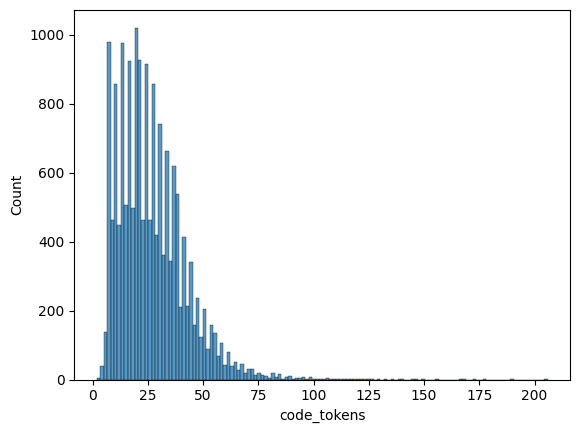

In [38]:
sns.histplot(joined_df['code_tokens'].apply(len))

Docstrings:

In [22]:
train['docstring_tokens'].apply(len).describe()

count    13756.000000
mean        16.043036
std         14.728184
min          1.000000
25%          6.000000
50%         12.000000
75%         21.000000
max        100.000000
Name: docstring_tokens, dtype: float64

In [39]:
val['docstring_tokens'].apply(len).describe()

count    1719.000000
mean       15.575334
std        13.871227
min         1.000000
25%         6.000000
50%        11.000000
75%        21.000000
max        95.000000
Name: docstring_tokens, dtype: float64

In [40]:
test['docstring_tokens'].apply(len).describe()

count    1719.000000
mean       15.776614
std        14.717167
min         1.000000
25%         6.000000
50%        11.000000
75%        21.000000
max        99.000000
Name: docstring_tokens, dtype: float64

<Axes: xlabel='docstring_tokens', ylabel='Count'>

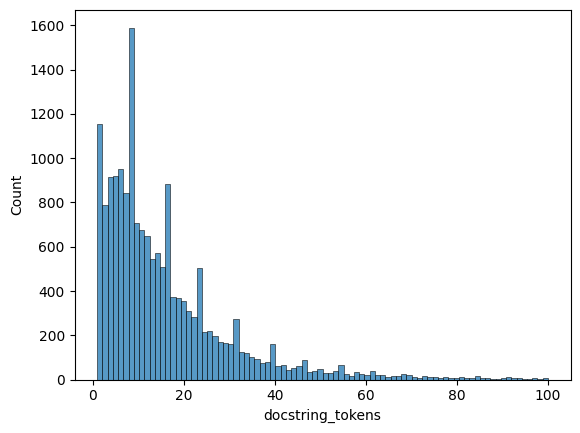

In [41]:
sns.histplot(joined_df['docstring_tokens'].apply(len))

## Deep analysis

### Check count of each access modifier

Private

In [52]:
train_private_count = train['code_tokens'].apply(lambda x: x if 'private' in x else None).dropna().count()
val_private_count = val['code_tokens'].apply(lambda x: x if 'private' in x else None).dropna().count()
test_private_count = test['code_tokens'].apply(lambda x: x if 'private' in x else None).dropna().count()


print("Train:", train_private_count,  f"({int(train_private_count / train.shape[0] * 100)}%)")
print("Val:", val_private_count,  f"({int(val_private_count / val.shape[0] * 100)}%)")
print("Test:", test_private_count,  f"({int(test_private_count / test.shape[0] * 100)}%)")

Train: 2626 (19%)
Val: 349 (20%)
Test: 322 (18%)


Public

In [53]:
train_public_count = train['code_tokens'].apply(lambda x: x if 'public' in x else None).dropna().count()
val_public_count = val['code_tokens'].apply(lambda x: x if 'public' in x else None).dropna().count()
test_public_count = test['code_tokens'].apply(lambda x: x if 'public' in x else None).dropna().count()


print("Train:", train_public_count,  f"({int(train_public_count / train.shape[0] * 100)}%)")
print("Val:", val_public_count,  f"({int(val_public_count / val.shape[0] * 100)}%)")
print("Test:", test_public_count,  f"({int(test_public_count / test.shape[0] * 100)}%)")

Train: 9326 (67%)
Val: 1164 (67%)
Test: 1157 (67%)


Protected

In [55]:
train_protected_count = train['code_tokens'].apply(lambda x: x if 'protected' in x else None).dropna().count()
val_protected_count = val['code_tokens'].apply(lambda x: x if 'protected' in x else None).dropna().count()
test_protected_count = test['code_tokens'].apply(lambda x: x if 'protected' in x else None).dropna().count()

print("Train:", train_protected_count,  f"({int(train_protected_count / train.shape[0] * 100)}%)")
print("Val:", val_protected_count,  f"({int(val_protected_count / val.shape[0] * 100)}%)")
print("Test:", test_protected_count,  f"({int(test_protected_count / test.shape[0] * 100)}%)")

Train: 1178 (8%)
Val: 138 (8%)
Test: 142 (8%)


Default

In [57]:
train_default_count = train['code_tokens'].apply(lambda x: x if not any(modifier in x for modifier in ['protected', 'public', 'private']) else None).dropna().count()
val_default_count = val['code_tokens'].apply(lambda x: x if not any(modifier in x for modifier in ['protected', 'public', 'private']) else None).dropna().count()
test_default_count = test['code_tokens'].apply(lambda x: x if not any(modifier in x for modifier in ['protected', 'public', 'private']) else None).dropna().count()

print("Train:", train_default_count,  f"({int(train_default_count / train.shape[0] * 100)}%)")
print("Val:", val_default_count,  f"({int(val_default_count / val.shape[0] * 100)}%)")
print("Test:", test_default_count,  f"({int(test_default_count / test.shape[0] * 100)}%)")

Train: 746 (5%)
Val: 79 (4%)
Test: 110 (6%)


### Number of unique tokens

Codes:

In [73]:
code_tokens_list = joined_df['code_tokens'].tolist()
code_tokens_list = [item for sublist in code_tokens_list for item in sublist]
print(len(code_tokens_list))

462403


In [74]:
unique_code_tokens_list = list(set(code_tokens_list))
print('Number of unique tokens in code:', len(unique_code_tokens_list))

Number of unique tokens in code: 131762


Docstrings:

In [75]:
docstring_tokens_list = joined_df['docstring_tokens'].tolist()
docstring_tokens_list = [item for sublist in docstring_tokens_list for item in sublist]
print(len(docstring_tokens_list))

274582


In [76]:
unique_docstring_tokens_list = list(set(docstring_tokens_list))
print('Number of unique tokens in docstrings:', len(unique_docstring_tokens_list))

Number of unique tokens in docstrings: 35072


### Top frequent tokens

In [92]:
TOP_COUNT = 30

Codes

[('{', 34259), ('}', 34059), ('=', 21039), ('return', 13353), ('public', 11950), ('if', 9778), ('new', 7406), ('void', 6699), ('String', 4330), ('+', 3893), ('==', 3773), ('//', 3426), ('private', 3301), ('!=', 3208), ('null)', 3088), ('boolean', 2804), ('throws', 2795), (':', 2404), ('final', 2370), ('for', 2244), ('static', 2193), ('the', 2138), ('int', 2045), ('&&', 1926), ('try', 1897), ('else', 1797), ('null', 1785), ('null;', 1753), ('catch', 1662), ('throw', 1624)]


<Axes: >

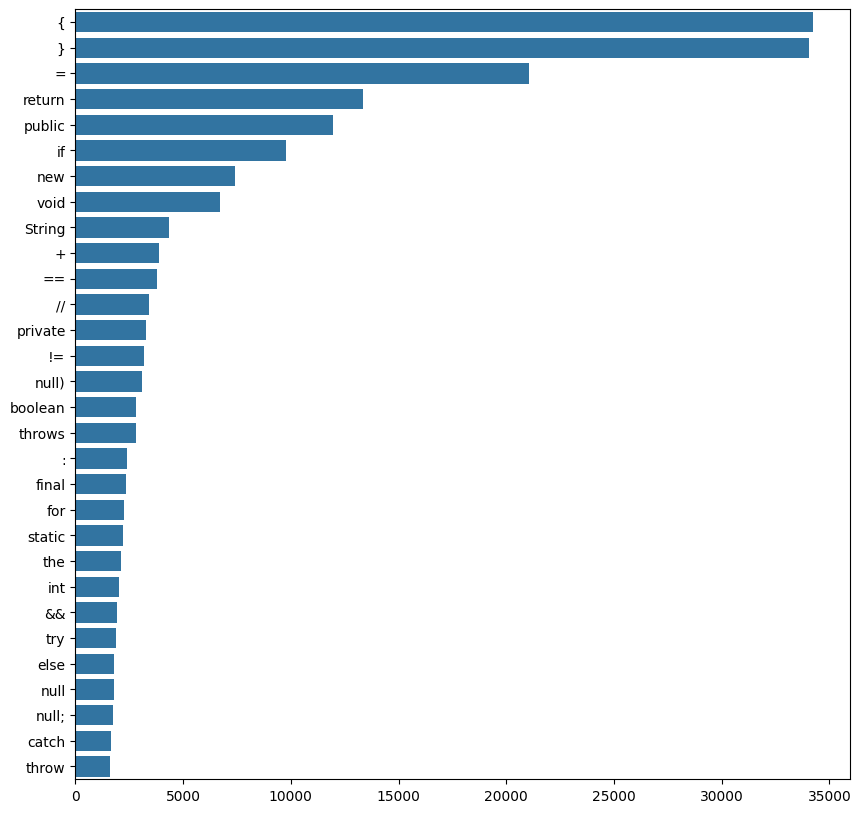

In [95]:
token_counts = Counter(code_tokens_list)


plt.figure(figsize=(10, 10))
sns.barplot(y=[x[0] for x in token_counts.most_common(TOP_COUNT)],
            x=[x[1] for x in token_counts.most_common(TOP_COUNT)])

In [99]:
pprint(token_counts.most_common(TOP_COUNT))

[('{', 34259),
 ('}', 34059),
 ('=', 21039),
 ('return', 13353),
 ('public', 11950),
 ('if', 9778),
 ('new', 7406),
 ('void', 6699),
 ('String', 4330),
 ('+', 3893),
 ('==', 3773),
 ('//', 3426),
 ('private', 3301),
 ('!=', 3208),
 ('null)', 3088),
 ('boolean', 2804),
 ('throws', 2795),
 (':', 2404),
 ('final', 2370),
 ('for', 2244),
 ('static', 2193),
 ('the', 2138),
 ('int', 2045),
 ('&&', 1926),
 ('try', 1897),
 ('else', 1797),
 ('null', 1785),
 ('null;', 1753),
 ('catch', 1662),
 ('throw', 1624)]


Docstrings

<Axes: >

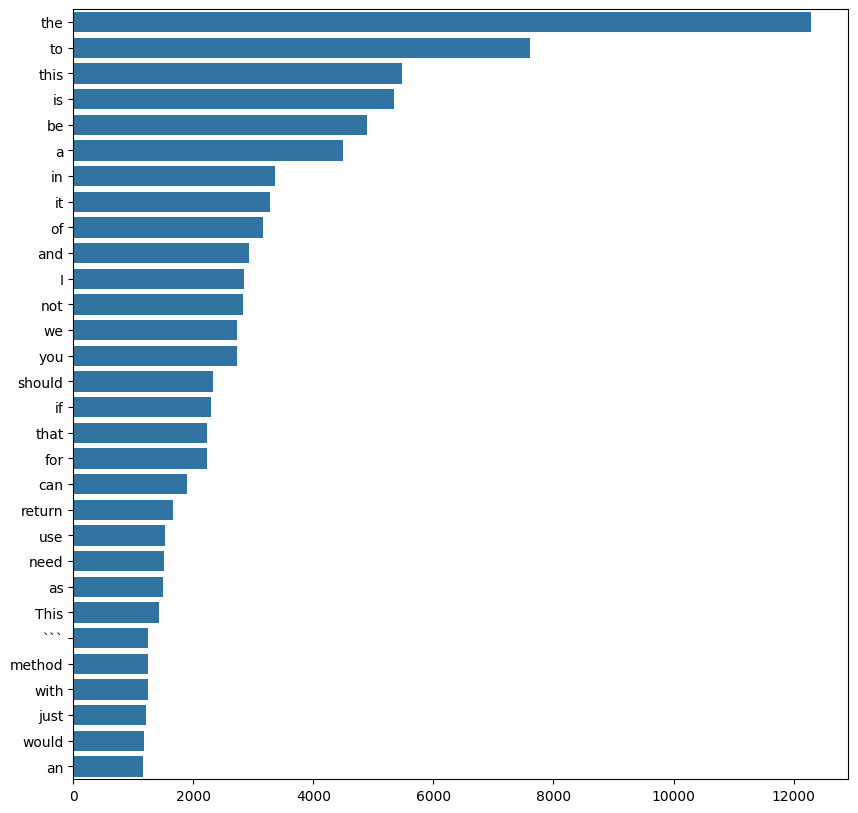

In [100]:
token_counts = Counter(docstring_tokens_list)

plt.figure(figsize=(10, 10))
sns.barplot(y=[x[0] for x in token_counts.most_common(TOP_COUNT)],
            x=[x[1] for x in token_counts.most_common(TOP_COUNT)])

In [101]:
pprint(token_counts.most_common(TOP_COUNT))

[('the', 12298),
 ('to', 7612),
 ('this', 5480),
 ('is', 5339),
 ('be', 4890),
 ('a', 4499),
 ('in', 3367),
 ('it', 3272),
 ('of', 3161),
 ('and', 2922),
 ('I', 2836),
 ('not', 2823),
 ('we', 2734),
 ('you', 2725),
 ('should', 2328),
 ('if', 2289),
 ('that', 2226),
 ('for', 2224),
 ('can', 1894),
 ('return', 1664),
 ('use', 1532),
 ('need', 1506),
 ('as', 1489),
 ('This', 1435),
 ('```', 1252),
 ('method', 1247),
 ('with', 1236),
 ('just', 1213),
 ('would', 1181),
 ('an', 1167)]


## Summary

This is dataset is reasonably splited. However, these information still can't give any leap idea for next step.